## Sampling-based vs. Anytime Planners
In this notebook, we investigate the trade-off between sampling-based and anytime planners to compare the results from an anytime planner against the sampling-based planner in combination with a post-smoothing method. They could take approximately the same time and maybe it is beneficial to have a fast planner and an efficitive post-smoothing step vs. a single anytime planner.

In [1]:
%load_ext autoreload
%autoreload 2
import mpb
from mpb import MPB, MultipleMPB
from definitions import all_planners, sampling_planners, \
                        anytime_planners, sbpl_planners

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt

Available memory: 21.87 GB, limiting each MPB process to 41.7% usage (9.11 GB).
Creating pool of 12 processes.
Running MPB with ID sampling_rrt (log file at sam_vs_any/sampling_rrt.log)...Running MPB with ID sampling_theta_star (log file at sam_vs_any/sampling_theta_star.log)...Running MPB with ID anytime_rrt_star_30 (log file at sam_vs_any/anytime_rrt_star_30.log)...Running MPB with ID sampling_stride (log file at sam_vs_any/sampling_stride.log)...Running MPB with ID sampling_kpiece (log file at sam_vs_any/sampling_kpiece.log)...Running MPB with ID sampling_sbl (log file at sam_vs_any/sampling_sbl.log)...Running MPB with ID anytime_rrt_star_10 (log file at sam_vs_any/anytime_rrt_star_10.log)...


Running MPB with ID anytime_rrt_sharp_10 (log file at sam_vs_any/anytime_rrt_sharp_10.log)...Running MPB with ID anytime_informed_rrt_star_10 (log file at sam_vs_any/anytime_informed_rrt_star_10.log)...
Running MPB with ID anytime_rrt_sharp_60 (log file at sam_vs_any/anytime_rrt_sharp_60.log)


Benchmark 0 (sampling_rrt) finished successfully.
Running MPB with ID sampling_est (log file at sam_vs_any/sampling_est.log)...



Benchmark 2 (sampling_sbl) finished successfully.
Running MPB with ID sampling_prm (log file at sam_vs_any/sampling_prm.log)...



Benchmark 8 (sampling_stride) finished successfully.
Running MPB with ID anytime_rrt_star_5 (log file at sam_vs_any/anytime_rrt_star_5.log)...



Benchmark 1 (sampling_est) finished successfully.
Running MPB with ID anytime_informed_rrt_star_30 (log file at sam_vs_any/anytime_informed_rrt_star_30.log)...



Benchmark 6 (sampling_kpiece) finished successfully.
Running MPB with ID sampling_pdst (log file at sam_vs_any/sampling_pdst.log)...



Benchmark 7 (sampling_pdst) finished successfully.
Running MPB with ID anytime_informed_rrt_star_60 (log file at sam_vs_any/anytime_informed_rrt_star_60.log)...



Benchmark 9 (anytime_rrt_star_5) finished successfully.
Running MPB with ID anytime_sorrt_star_10 (log file at sam_vs_any/anytime_sorrt_star_10.log)...



Benchmark 16 (anytime_rrt_sharp_10) finished successfully.
Running MPB with ID anytime_rrt_sharp_15 (log file at sam_vs_any/anytime_rrt_sharp_15.log)...



Benchmark 10 (anytime_rrt_star_10) finished successfully.
Running MPB with ID anytime_rrt_star_15 (log file at sam_vs_any/anytime_rrt_star_15.log)...



Benchmark 22 (anytime_informed_rrt_star_10) finished successfully.
Running MPB with ID anytime_informed_rrt_star_15 (log file at sam_vs_any/anytime_informed_rrt_star_15.log)...



Benchmark 28 (anytime_sorrt_star_10) finished successfully.
Running MPB with ID anytime_sorrt_star_15 (log file at sam_vs_any/anytime_sorrt_star_15.log)...



Benchmark 17 (anytime_rrt_sharp_15) finished successfully.
Running MPB with ID anytime_sorrt_star_30 (log file at sam_vs_any/anytime_sorrt_star_30.log)...



Benchmark 11 (anytime_rrt_star_15) finished successfully.
Running MPB with ID anytime_sorrt_star_60 (log file at sam_vs_any/anytime_sorrt_star_60.log)...



Benchmark 23 (anytime_informed_rrt_star_15) finished successfully.
Running MPB with ID anytime_prm_star_10 (log file at sam_vs_any/anytime_prm_star_10.log)...



Benchmark 18 (anytime_rrt_sharp_30) finished successfully.
Running MPB with ID anytime_rrt_sharp_45 (log file at sam_vs_any/anytime_rrt_sharp_45.log)...



Benchmark 12 (anytime_rrt_star_30) finished successfully.
Running MPB with ID anytime_rrt_star_45 (log file at sam_vs_any/anytime_rrt_star_45.log)...



Benchmark 24 (anytime_informed_rrt_star_30) finished successfully.
Running MPB with ID anytime_informed_rrt_star_45 (log file at sam_vs_any/anytime_informed_rrt_star_45.log)...



Benchmark 29 (anytime_sorrt_star_15) finished successfully.
Running MPB with ID anytime_prm_star_30 (log file at sam_vs_any/anytime_prm_star_30.log)...



Benchmark 34 (anytime_prm_star_10) finished successfully.
Running MPB with ID anytime_prm_star_15 (log file at sam_vs_any/anytime_prm_star_15.log)...



Benchmark 4 (sampling_theta_star) finished successfully.
Running MPB with ID sampling_sst (log file at sam_vs_any/sampling_sst.log)...



Benchmark 3 (sampling_prm) finished successfully.
Running MPB with ID anytime_prm_star_60 (log file at sam_vs_any/anytime_prm_star_60.log)...



Benchmark 35 (anytime_prm_star_15) finished successfully.
Running MPB with ID anytime_fmt_10 (log file at sam_vs_any/anytime_fmt_10.log)...



Benchmark 30 (anytime_sorrt_star_30) finished successfully.
Running MPB with ID anytime_sorrt_star_45 (log file at sam_vs_any/anytime_sorrt_star_45.log)...



Benchmark 20 (anytime_rrt_sharp_60) finished successfully.
Running MPB with ID anytime_informed_rrt_star_5 (log file at sam_vs_any/anytime_informed_rrt_star_5.log)...



Benchmark 14 (anytime_rrt_star_60) finished successfully.
Running MPB with ID anytime_rrt_sharp_5 (log file at sam_vs_any/anytime_rrt_sharp_5.log)...



Benchmark 40 (anytime_fmt_10) finished successfully.
Running MPB with ID anytime_fmt_15 (log file at sam_vs_any/anytime_fmt_15.log)...



Benchmark 41 (anytime_fmt_15) finished successfully.
Running MPB with ID anytime_fmt_30 (log file at sam_vs_any/anytime_fmt_30.log)...



Benchmark 21 (anytime_informed_rrt_star_5) finished successfully.
Running MPB with ID anytime_fmt_60 (log file at sam_vs_any/anytime_fmt_60.log)...



Benchmark 15 (anytime_rrt_sharp_5) finished successfully.
Running MPB with ID anytime_bfmt_10 (log file at sam_vs_any/anytime_bfmt_10.log)...



Benchmark 42 (anytime_fmt_30) finished successfully.
Running MPB with ID anytime_fmt_45 (log file at sam_vs_any/anytime_fmt_45.log)...



Benchmark 46 (anytime_bfmt_10) finished successfully.
Running MPB with ID anytime_bfmt_15 (log file at sam_vs_any/anytime_bfmt_15.log)...



Benchmark 26 (anytime_informed_rrt_star_60) finished successfully.
Running MPB with ID anytime_sorrt_star_5 (log file at sam_vs_any/anytime_sorrt_star_5.log)...



Benchmark 36 (anytime_prm_star_30) finished successfully.
Running MPB with ID anytime_prm_star_45 (log file at sam_vs_any/anytime_prm_star_45.log)...



Benchmark 44 (anytime_fmt_60) finished successfully.
Running MPB with ID anytime_bfmt_5 (log file at sam_vs_any/anytime_bfmt_5.log)...



Benchmark 43 (anytime_fmt_45) finished successfully.
Running MPB with ID anytime_bfmt_30 (log file at sam_vs_any/anytime_bfmt_30.log)...



Benchmark 47 (anytime_bfmt_15) finished successfully.
Running MPB with ID anytime_bfmt_60 (log file at sam_vs_any/anytime_bfmt_60.log)...



Benchmark 45 (anytime_bfmt_5) finished successfully.
Running MPB with ID anytime_cforest_10 (log file at sam_vs_any/anytime_cforest_10.log)...



Benchmark 48 (anytime_bfmt_30) finished successfully.
Running MPB with ID anytime_bfmt_45 (log file at sam_vs_any/anytime_bfmt_45.log)...



Benchmark 19 (anytime_rrt_sharp_45) finished successfully.
Running MPB with ID anytime_cforest_30 (log file at sam_vs_any/anytime_cforest_30.log)...



Benchmark 27 (anytime_sorrt_star_5) finished successfully.
Running MPB with ID anytime_cforest_60 (log file at sam_vs_any/anytime_cforest_60.log)...

Benchmark 13 (anytime_rrt_star_45) finished successfully.
Running MPB with ID anytime_bit_star_10 (log file at sam_vs_any/anytime_bit_star_10.log)...



Benchmark 50 (anytime_bfmt_60) finished successfully.
Running MPB with ID anytime_cforest_5 (log file at sam_vs_any/anytime_cforest_5.log)...



Benchmark 25 (anytime_informed_rrt_star_45) finished successfully.
Running MPB with ID anytime_bit_star_30 (log file at sam_vs_any/anytime_bit_star_30.log)...



Benchmark 49 (anytime_bfmt_45) finished successfully.
Running MPB with ID anytime_bit_star_60 (log file at sam_vs_any/anytime_bit_star_60.log)...



Benchmark 52 (anytime_cforest_10) finished successfully.
Running MPB with ID anytime_cforest_15 (log file at sam_vs_any/anytime_cforest_15.log)...


Killed anytime_cforest_5 with planner cforest after 50.01s exceeded timeout.



Benchmark 51 (anytime_cforest_5) failed. Return code: -9.


Running MPB with ID anytime_spars_10 (log file at sam_vs_any/anytime_spars_10.log)...



Benchmark 32 (anytime_sorrt_star_60) finished successfully.
Running MPB with ID anytime_prm_star_5 (log file at sam_vs_any/anytime_prm_star_5.log)...



Benchmark 58 (anytime_bit_star_10) finished successfully.
Running MPB with ID anytime_bit_star_15 (log file at sam_vs_any/anytime_bit_star_15.log)...


Killed anytime_prm_star_5 with planner prm_star after 50.02s exceeded timeout.



Benchmark 33 (anytime_prm_star_5) failed. Return code: -9.


Running MPB with ID anytime_spars_30 (log file at sam_vs_any/anytime_spars_30.log)...



Benchmark 64 (anytime_spars_10) finished successfully.
Running MPB with ID anytime_spars_15 (log file at sam_vs_any/anytime_spars_15.log)...



Benchmark 53 (anytime_cforest_15) finished successfully.
Running MPB with ID anytime_spars_60 (log file at sam_vs_any/anytime_spars_60.log)...



Benchmark 31 (anytime_sorrt_star_45) finished successfully.
Running MPB with ID anytime_spars2_10 (log file at sam_vs_any/anytime_spars2_10.log)...



Benchmark 54 (anytime_cforest_30) finished successfully.
Running MPB with ID anytime_cforest_45 (log file at sam_vs_any/anytime_cforest_45.log)...



Benchmark 5 (sampling_sst) finished successfully.
Running MPB with ID anytime_spars2_30 (log file at sam_vs_any/anytime_spars2_30.log)...



Benchmark 59 (anytime_bit_star_15) finished successfully.
Running MPB with ID anytime_spars2_60 (log file at sam_vs_any/anytime_spars2_60.log)...



Benchmark 60 (anytime_bit_star_30) finished successfully.
Running MPB with ID anytime_bit_star_45 (log file at sam_vs_any/anytime_bit_star_45.log)...



Benchmark 38 (anytime_prm_star_60) finished successfully.
Running MPB with ID anytime_fmt_5 (log file at sam_vs_any/anytime_fmt_5.log)...



Benchmark 37 (anytime_prm_star_45) finished successfully.

Benchmark 70 (anytime_spars2_10) finished successfully.
Running MPB with ID anytime_spars2_15 (log file at sam_vs_any/anytime_spars2_15.log)...



Benchmark 65 (anytime_spars_15) finished successfully.

Benchmark 39 (anytime_fmt_5) finished successfully.

Benchmark 66 (anytime_spars_30) finished successfully.
Running MPB with ID anytime_spars_45 (log file at sam_vs_any/anytime_spars_45.log)...



Benchmark 56 (anytime_cforest_60) finished successfully.
Running MPB with ID anytime_bit_star_5 (log file at sam_vs_any/anytime_bit_star_5.log)...



Benchmark 71 (anytime_spars2_15) finished successfully.

Benchmark 72 (anytime_spars2_30) finished successfully.
Running MPB with ID anytime_spars2_45 (log file at sam_vs_any/anytime_spars2_45.log)...



Benchmark 57 (anytime_bit_star_5) finished successfully.

Benchmark 62 (anytime_bit_star_60) finished successfully.
Running MPB with ID anytime_spars_5 (log file at sam_vs_any/anytime_spars_5.log)...



Benchmark 55 (anytime_cforest_45) finished successfully.

Benchmark 63 (anytime_spars_5) finished successfully.

Benchmark 61 (anytime_bit_star_45) finished successfully.

Benchmark 68 (anytime_spars_60) finished successfully.
Running MPB with ID anytime_spars2_5 (log file at sam_vs_any/anytime_spars2_5.log)...



Benchmark 69 (anytime_spars2_5) finished successfully.

Benchmark 74 (anytime_spars2_60) finished successfully.

Benchmark 67 (anytime_spars_45) finished successfully.

Benchmark 73 (anytime_spars2_45) finished successfully.


Error(s) occurred, not all benchmarks succeeded.
Benchmark 33 failed with return code -9. See log file sam_vs_any/anytime_prm_star_5.log.
Benchmark 51 failed with return code -9. See log file sam_vs_any/anytime_cforest_5.log.


False

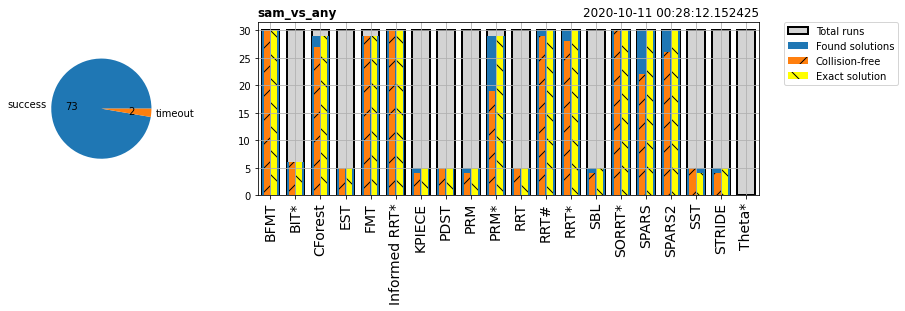

In [2]:
pool = MultipleMPB()
for planner in sampling_planners:
    m = MPB()
    m["max_planning_time"] = 50
    m.set_corridor_grid_env(width=150, height=150, branches=100, radius=5)
    m.set_planners([planner])
    m.set_steer_functions(['reeds_shepp'])
    m.set_smoothers(['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max'])
    m.set_id('sampling_%s' % planner)
    pool.benchmarks.append(m)    

for planner in anytime_planners:
    for max_time in [5, 10, 15, 30, 45, 60]:
        m = MPB()
        m.set_corridor_grid_env(width=150, height=150, branches=100, radius=5)
        m.set_planners([planner])
        m.set_steer_functions(['reeds_shepp'])
        m["max_planning_time"] = max_time
        m.set_smoothers(['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max'])
        m.set_id('anytime_%s_%i' % (planner, max_time))
        pool.benchmarks.append(m)
pool.run_parallel('sam_vs_any', runs=5)

In [3]:
pool.visualize_trajectories(run_id='1', show_smoother=True, show_legend=True)

TypeError: tuple indices must be integers or slices, not str

In [4]:
from copy import copy
from definitions import planner_names
plan_names = list(map(lambda p: planner_names[p], sampling_planners))
for planner in anytime_planners:
    for max_time in [5, 10, 15, 30, 45, 60]:
        plan_names.append("%s %02is" % (planner_names[planner], max_time))
MPB.merge(pool.benchmarks, "sampling_vs_anytime.json", plan_names=plan_names)

Successfully merged [sam_vs_any/sampling_rrt_results.json, sam_vs_any/sampling_est_results.json, sam_vs_any/sampling_sbl_results.json, sam_vs_any/sampling_prm_results.json, sam_vs_any/sampling_theta_star_results.json, sam_vs_any/sampling_sst_results.json, sam_vs_any/sampling_kpiece_results.json, sam_vs_any/sampling_pdst_results.json, sam_vs_any/sampling_stride_results.json, sam_vs_any/anytime_rrt_star_5_results.json, sam_vs_any/anytime_rrt_star_10_results.json, sam_vs_any/anytime_rrt_star_15_results.json, sam_vs_any/anytime_rrt_star_30_results.json, sam_vs_any/anytime_rrt_star_45_results.json, sam_vs_any/anytime_rrt_star_60_results.json, sam_vs_any/anytime_rrt_sharp_5_results.json, sam_vs_any/anytime_rrt_sharp_10_results.json, sam_vs_any/anytime_rrt_sharp_15_results.json, sam_vs_any/anytime_rrt_sharp_30_results.json, sam_vs_any/anytime_rrt_sharp_45_results.json, sam_vs_any/anytime_rrt_sharp_60_results.json, sam_vs_any/anytime_informed_rrt_star_5_results.json, sam_vs_any/anytime_informe

In [ ]:
from plot_stats import plot_planner_stats
plot_planner_stats("sampling_vs_anytime.json", fig_width=20, max_plots_per_line=1, save_file='sampling_vs_anytime_planners.pdf')

In [ ]:
from plot_stats import plot_smoother_stats
plot_smoother_stats("sampling_vs_anytime.json", fig_width=70, max_plots_per_line=1, save_file='sampling_vs_anytime_smoothers.pdf', num_colors=5)

In [24]:
from definitions import *
from utils import *
from color import *
import os
import json

def plot_metric(metric: str, run_id: int, ignore_planners: [str] = [], title: str = None, fig_width=10, fig_height=8, **kwargs):
    plt.figure(figsize=(fig_width, fig_height))
    if title is None:
        plt.title("%s (Run #%i)" % (stat_names[metric], run_id), fontsize=18)
    else:
        plt.title(title, fontsize=18)
    plt.grid()
    plt.xlabel("Computation Time [s]", fontsize=14)

    i = 0

    for planner in sampling_planners:
        if i >= len(pool.benchmarks):
            break
        elif not os.path.exists(pool.benchmarks[i].results_filename):
            i += 1
            continue
        if planner in ignore_planners:
            i += 1
            continue
        result = json.load(open(pool.benchmarks[i].results_filename, 'r'))
        i += 1
        times = []
        values = []
        if len(result["runs"]) <= run_id:
            continue
        run = result["runs"][run_id]
        if not planner_internal_names[planner] in run["plans"]:
            print("Planner %s could not be found!" % planner)
            continue
        plan = run["plans"][planner_internal_names[planner]]
        if not plan:
            print("Plan for %s is empty" % planner)
            continue
        time = plan["stats"]["planning_time"]
        value = plan["stats"][metric]
        if value is None:
            print("No stats exist for planner %s." % planner)
            continue
        times.append(time)
        values.append(value)
        if "smoothing" not in plan or not plan["smoothing"]:
            print("No smoothers for %s!" % planner)
        else:
            for smoother, marker in zip(plan["smoothing"].keys(), ["o", "X", "P", "v"]):
                smoothing = plan["smoothing"][smoother]
                smooth_time = smoothing["stats"]["planning_time"] + smoothing["time"]
                smooth_value = smoothing["stats"][metric]
                plt.plot(times + [smooth_time],
                         values + [smooth_value],
                         '*-', color=get_color(i, num_colors=20))
                plt.plot([smooth_time],
                         [smooth_value],
                         marker, color=get_color(i, num_colors=20), markersize=10,
                         label="%s (%s)" % (planner_names[planner], smoother_names[smoother]))


    for planner in anytime_planners:
        times = []
        values = []
        for max_time in [5, 10, 15, 30, 45, 60]:
            if i >= len(pool.benchmarks):
                break
            elif not os.path.exists(pool.benchmarks[i].results_filename):
                i += 1
                continue
            if planner in ignore_planners:
                i += 1
                continue
            result = json.load(open(pool.benchmarks[i].results_filename, 'r'))
            i += 1

            if len(result["runs"]) <= run_id:
                continue
            run = result["runs"][run_id]
            if not planner_internal_names[planner] in run["plans"]:
                print("Planner %s could not be found!" % planner)
                continue
            plan = run["plans"][planner_internal_names[planner]]
            if not plan or "stats" not in plan:
                print("Plan for %s is empty" % planner)
                continue
            time = plan["stats"]["planning_time"]
            value = plan["stats"][metric]

            times.append(time)
            values.append(value)
        if planner not in ignore_planners:
            plt.plot(times, values, '.-', label=planner_names[planner])

    plt.xlim([-1, 17])
    show_legend(**kwargs)
    plt.tight_layout()
    plt.savefig("sam_vs_any_%s_%i.pdf" % (metric, run_id), bbox_inches="tight")
    return plt

No stats exist for planner theta_star.
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
No stats exist for planner theta_star.
No stats exist for planner theta_star.
No stats exist for planner theta_star.
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
No stats exist for planner theta_star.
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
No stats exist for planner theta_star.
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
Plan for bit_star is empty
No stats exist for planner theta_star.
No stats exist for planner theta_star.
No stats exist for planner theta_star.
P

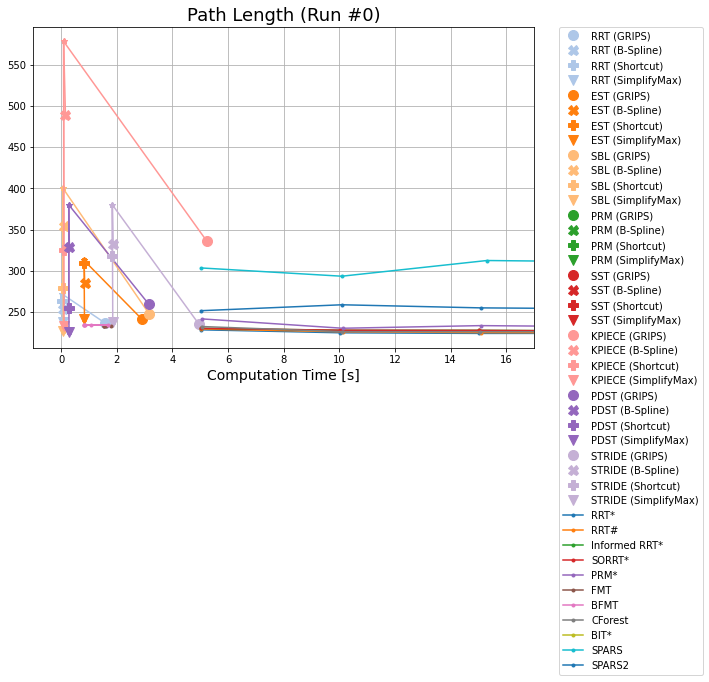

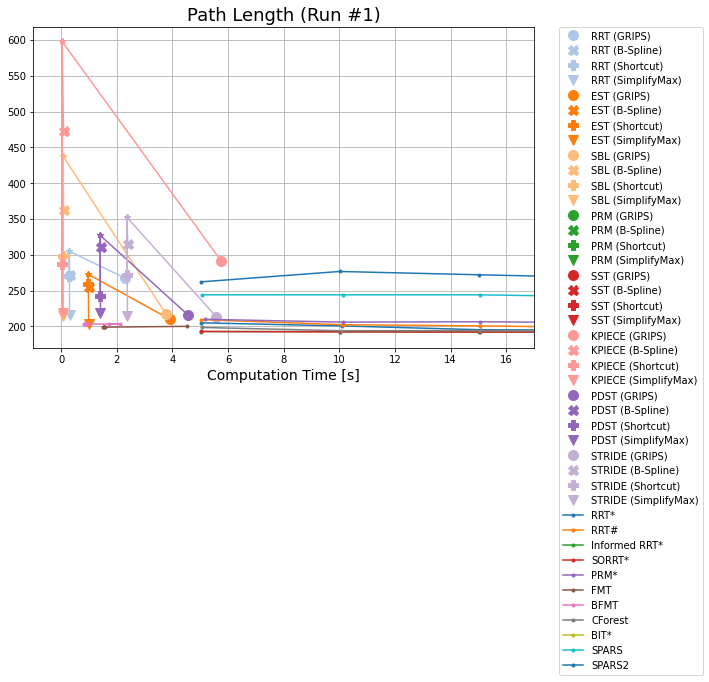

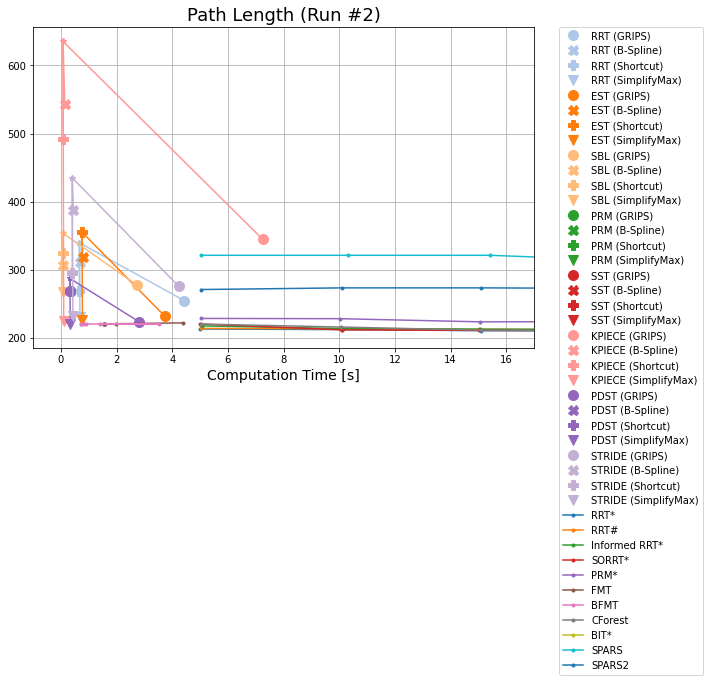

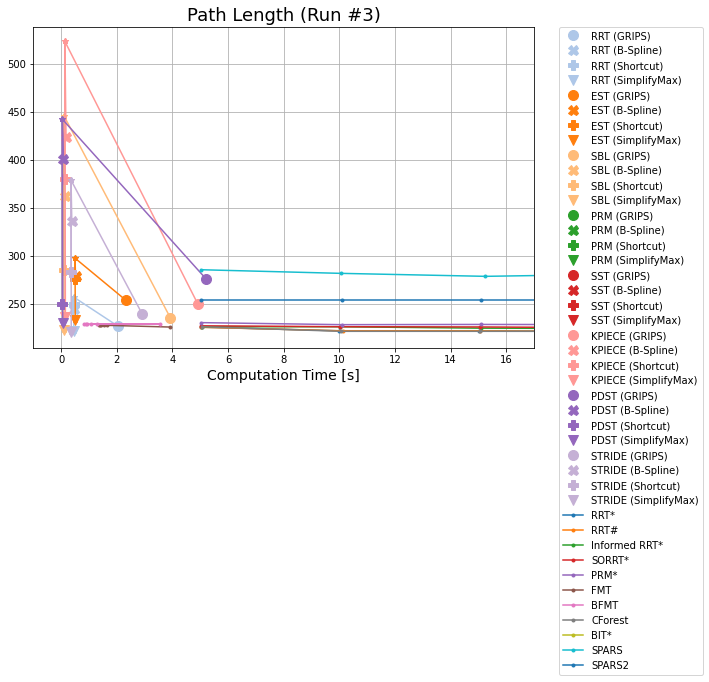

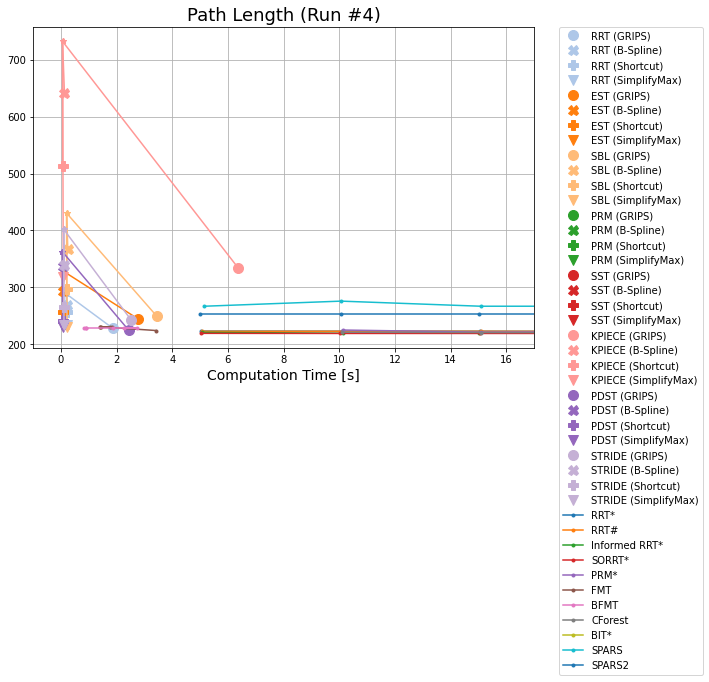

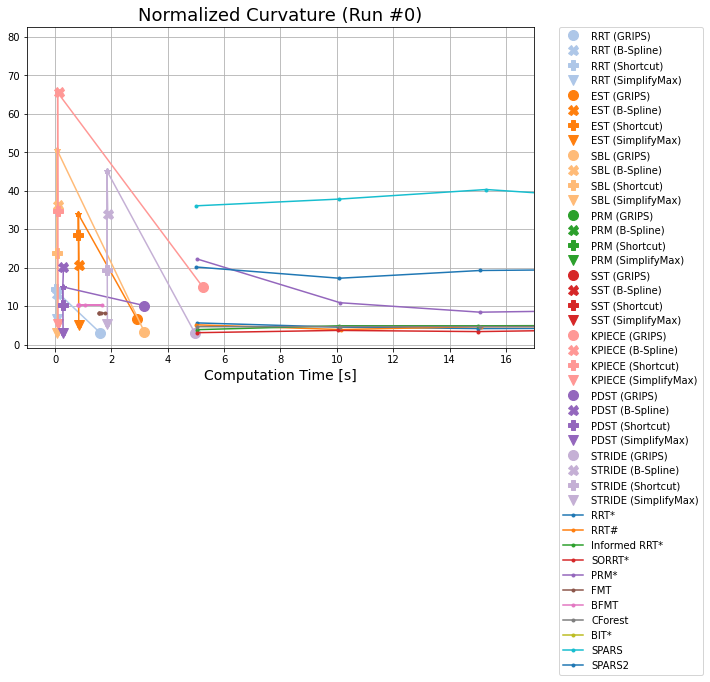

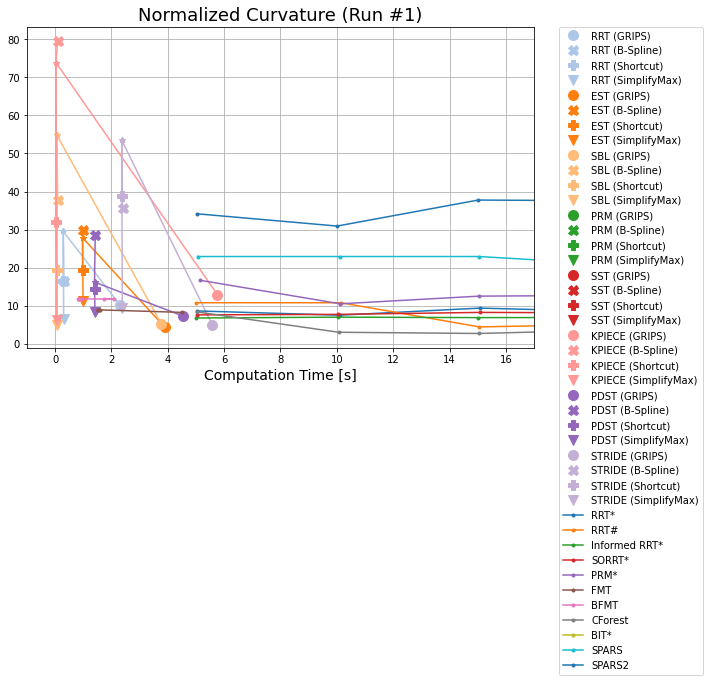

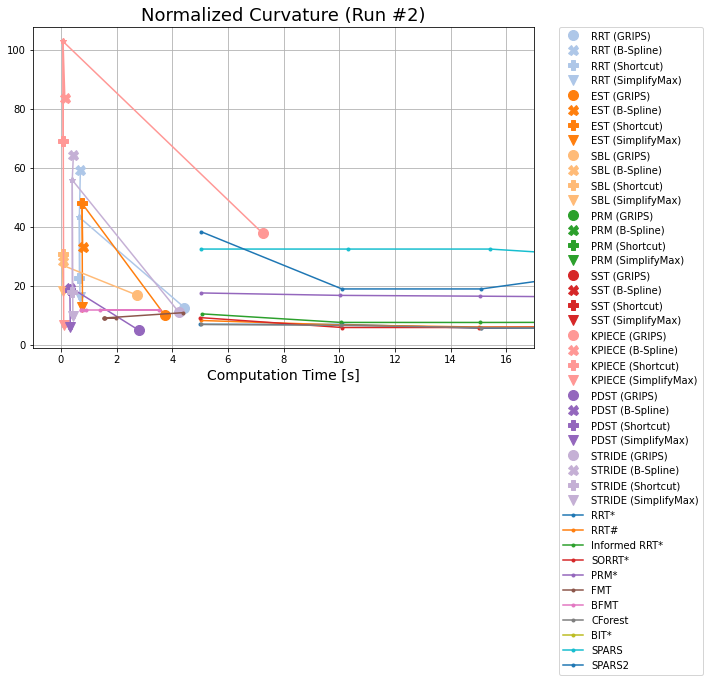

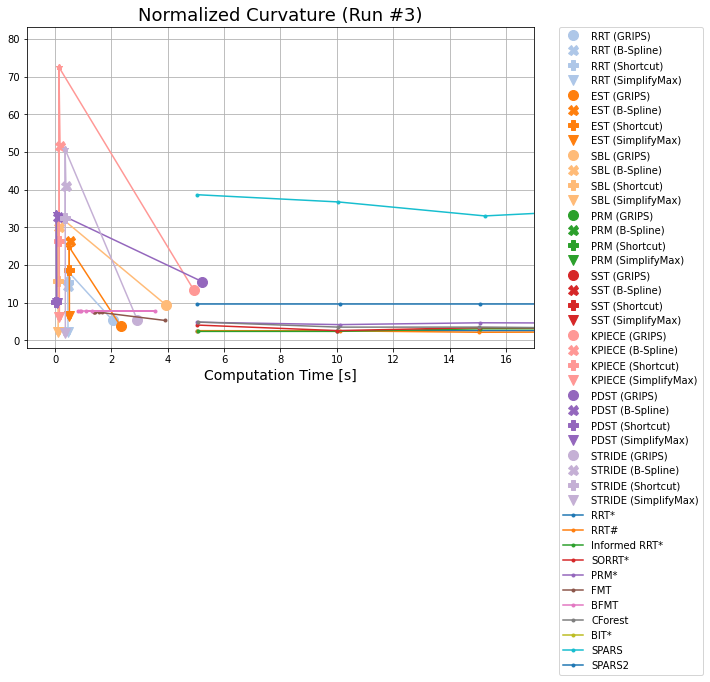

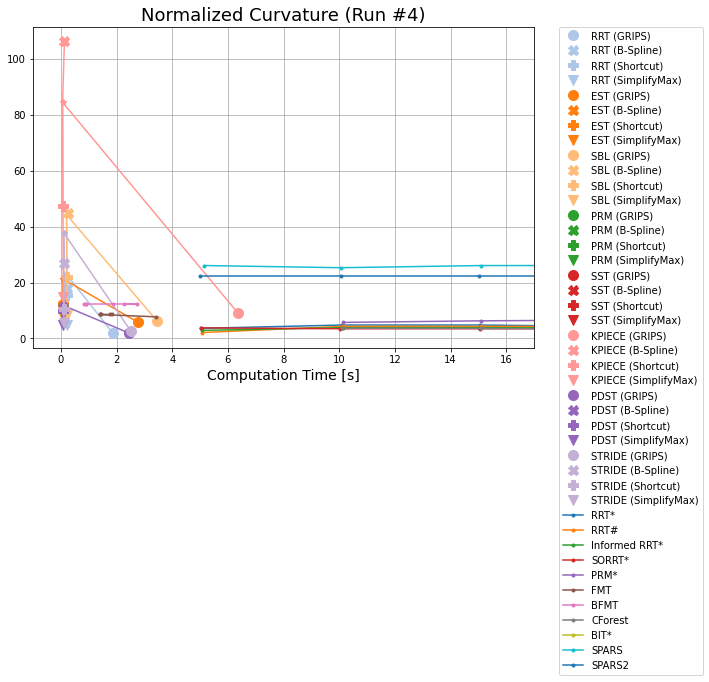

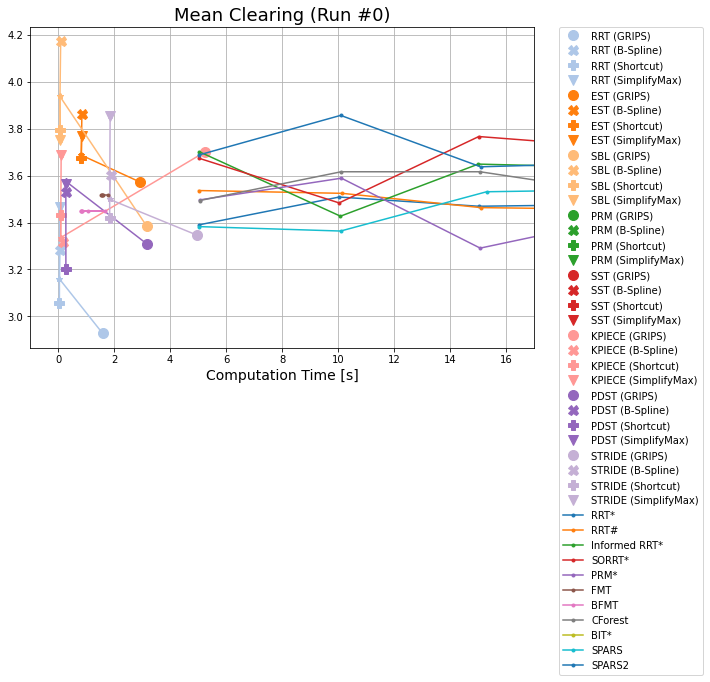

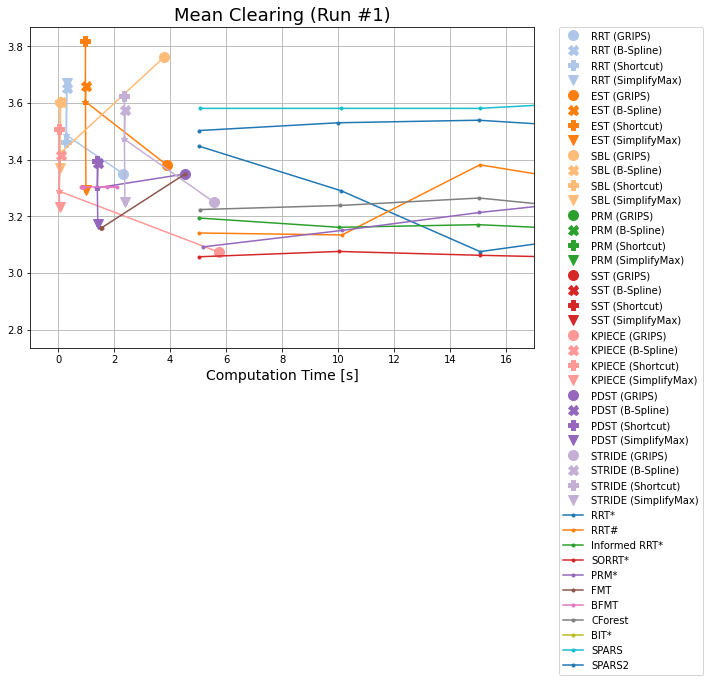

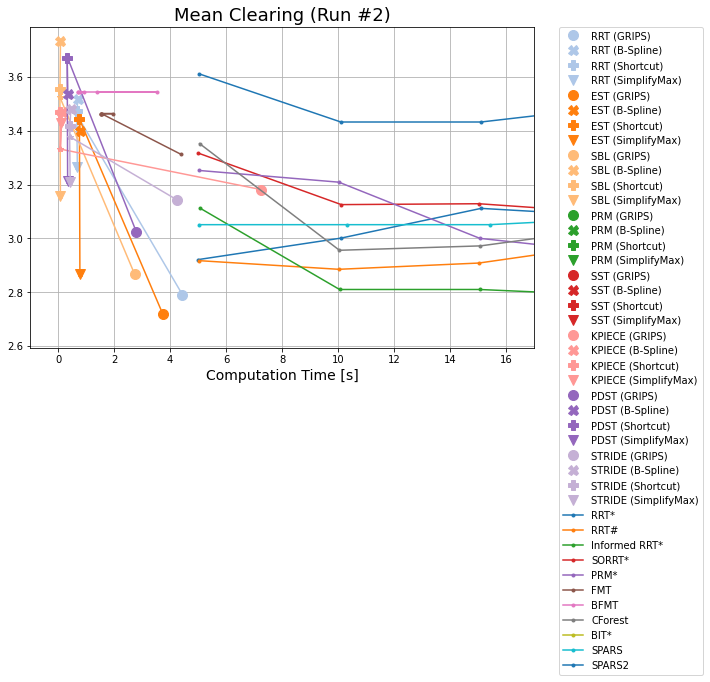

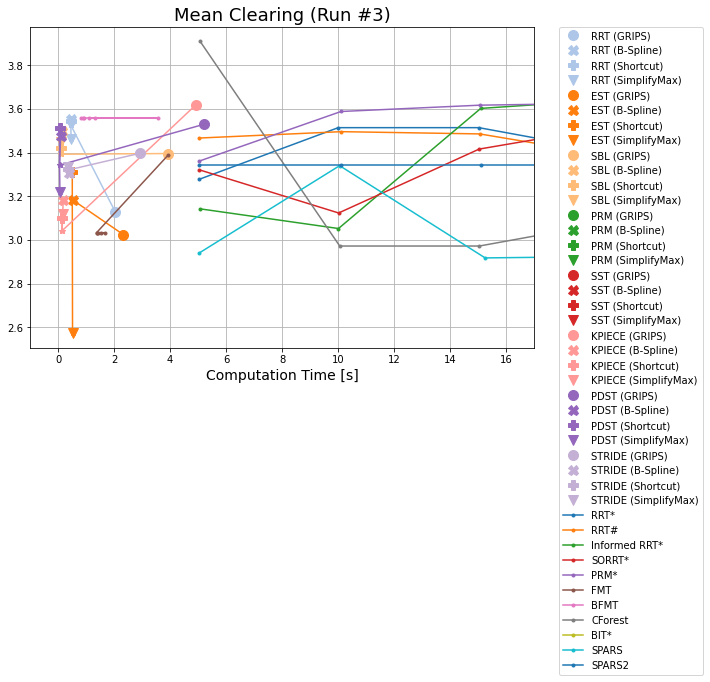

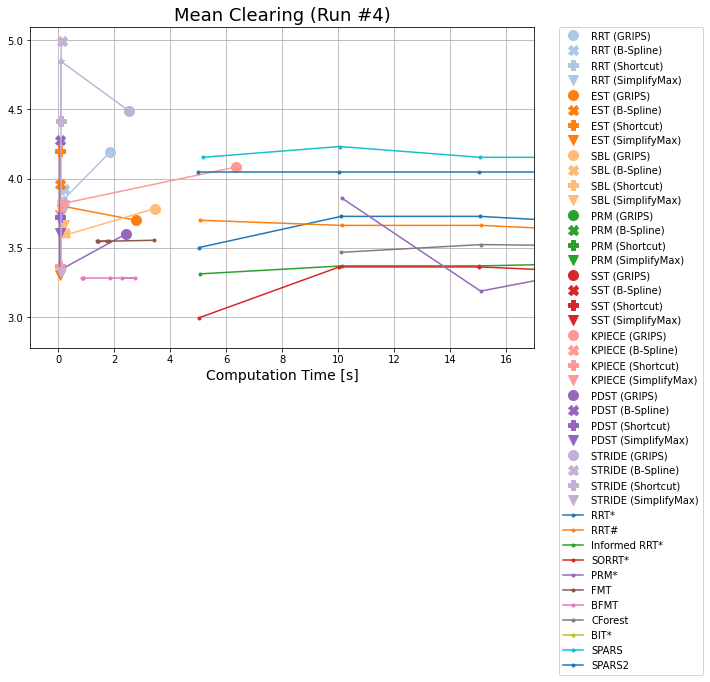

In [25]:
for metric in ["path_length", "normalized_curvature", "mean_clearing_distance"]:
    for run_id in range(5):
        plot_metric(metric, run_id)

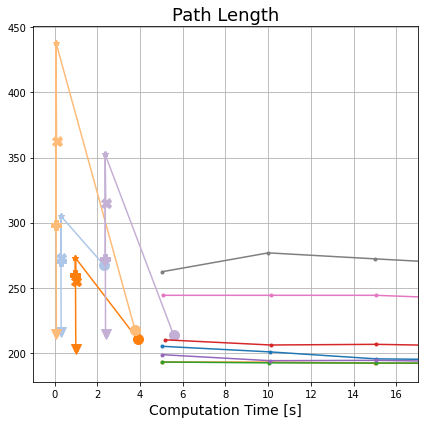

In [35]:
ignore_planners = ["kpiece", "pdst", "sst", "prm", "rrt_sharp", "fmt", "bfmt", "theta_star"]
plot_metric("path_length", 1, ignore_planners, title="Path Length", show_legend=False, fig_width=6, fig_height=6)
plt.tight_layout()
plt.savefig("sam_vs_any_path_length.pdf");
plt.savefig("sam_vs_any_path_length.png");

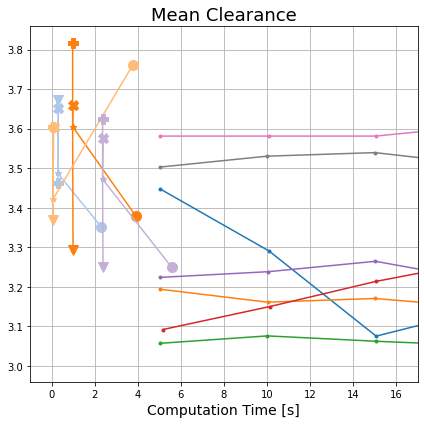

In [37]:
ignore_planners = ["kpiece", "pdst", "prm", "sst", "rrt_sharp", "fmt", "bfmt", "theta_star"]
plot_metric("mean_clearing_distance", 1, ignore_planners, title="Mean Clearance", show_legend=False, fig_width=6, fig_height=6)
plt.tight_layout()
plt.savefig("sam_vs_any_clearance.pdf");
plt.savefig("sam_vs_any_clearance.png");

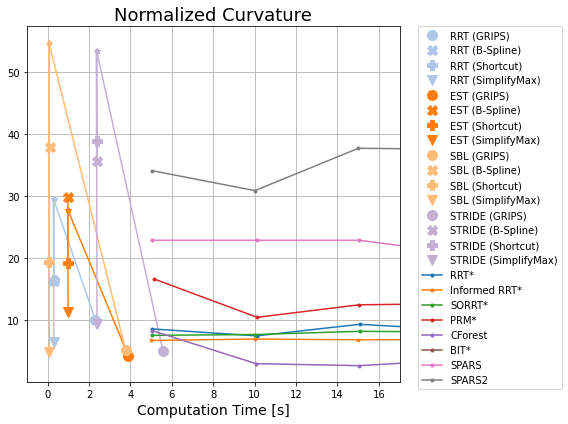

In [36]:
ignore_planners = ["kpiece", "pdst", "prm", "sst", "rrt_sharp", "fmt", "bfmt", "theta_star"]
plot_metric("normalized_curvature", 1, ignore_planners, title="Normalized Curvature", show_legend=True, fig_width=8, fig_height=6)
plt.tight_layout()
plt.savefig("sam_vs_any_curvature.pdf");
plt.savefig("sam_vs_any_curvature.png");

sampling_rrt
Visualizing sam_vs_any/sampling_rrt_results.json
Ignoring the following smoother(s): GRIPS, B-Spline, Shortcut
Saved sam_vs_any_rrt_simplifymax_traj.pdf.
anytime_informed_rrt_star_60
Visualizing sam_vs_any/anytime_informed_rrt_star_60_results.json


/home/eric/mpb/plotting/trajectory.py:564: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Saved sam_vs_any_informed_rrt_star_traj.pdf.


/home/eric/mpb/plotting/trajectory.py:564: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


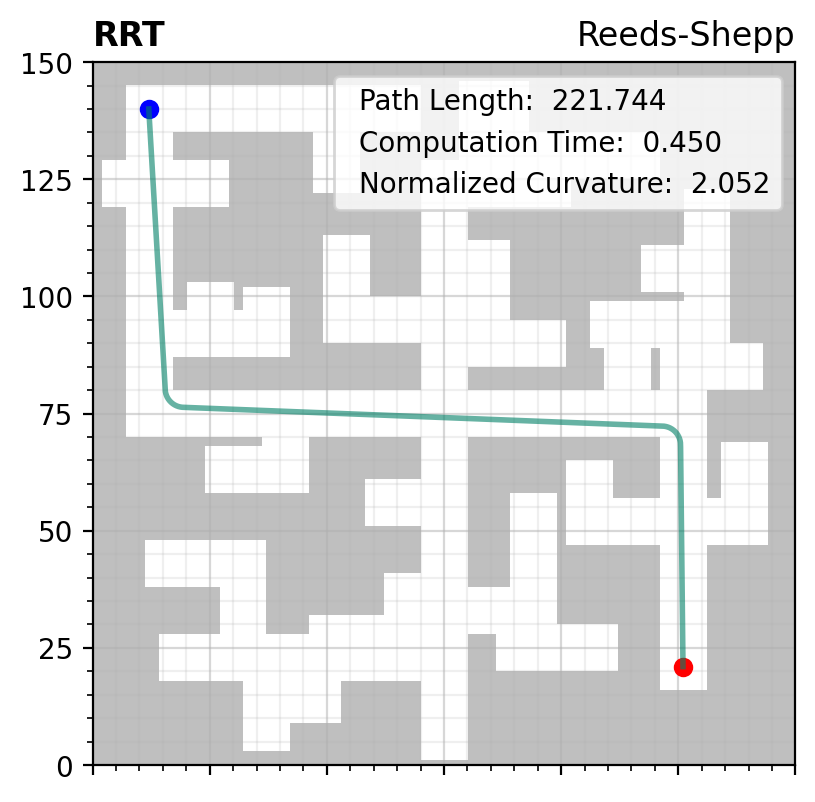

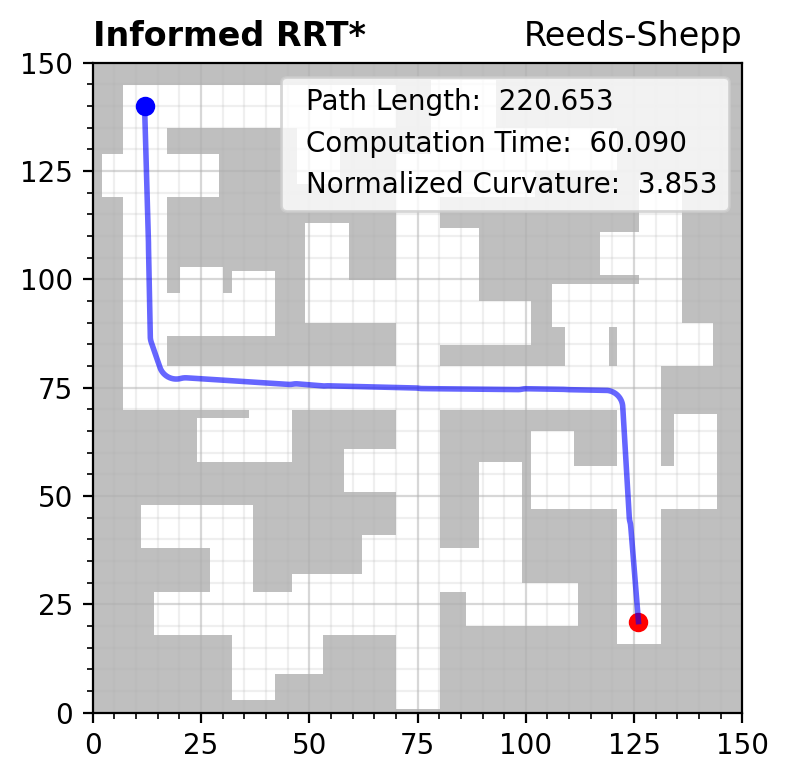

In [45]:
from trajectory import visualize_grid
i = -1
run_id = 3

for planner in sampling_planners:
    i += 1
    if planner != "rrt":
        continue
    print(pool.benchmarks[i].id)
    visualize_grid(pool.benchmarks[i].results_filename, run_id=str(run_id),
                   plot_every_nth_polygon=0, show_legend=False,
                   color_map_name='summer', fig_size=4,
                   save_file="sam_vs_any_%s_traj.pdf" % planner)
    visualize_grid(pool.benchmarks[i].results_filename, run_id=str(run_id),
                   plot_every_nth_polygon=0, show_legend=False,
                   show_only_smoother=True, show_smoother=True,
                   ignore_smoothers="grips,bspline,shortcut",
                   color_map_name='summer', fig_size=4,
                   save_file="sam_vs_any_%s_simplifymax_traj.pdf" % planner)

for planner in anytime_planners:
    times = []
    values = []
    for max_time in [5, 10, 15, 30, 45, 60]:        
        i += 1        
        if planner == "informed_rrt_star" and max_time == 60:
            print(pool.benchmarks[i].id)
            visualize_grid(pool.benchmarks[i].results_filename, run_id=str(run_id),
                           plot_every_nth_polygon=0, show_legend=False,
                           color_map_name='winter', fig_size=4,
                           save_file="sam_vs_any_%s_traj.pdf" % planner)

In [20]:
for m in pool.benchmarks:
    print(m.id)

sampling_rrt
sampling_est
sampling_sbl
sampling_prm
sampling_theta_star
sampling_sst
sampling_kpiece
sampling_pdst
sampling_stride
anytime_rrt_star_5
anytime_rrt_star_10
anytime_rrt_star_15
anytime_rrt_star_30
anytime_rrt_star_45
anytime_rrt_star_60
anytime_rrt_sharp_5
anytime_rrt_sharp_10
anytime_rrt_sharp_15
anytime_rrt_sharp_30
anytime_rrt_sharp_45
anytime_rrt_sharp_60
anytime_informed_rrt_star_5
anytime_informed_rrt_star_10
anytime_informed_rrt_star_15
anytime_informed_rrt_star_30
anytime_informed_rrt_star_45
anytime_informed_rrt_star_60
anytime_sorrt_star_5
anytime_sorrt_star_10
anytime_sorrt_star_15
anytime_sorrt_star_30
anytime_sorrt_star_45
anytime_sorrt_star_60
anytime_prm_star_5
anytime_prm_star_10
anytime_prm_star_15
anytime_prm_star_30
anytime_prm_star_45
anytime_prm_star_60
anytime_fmt_5
anytime_fmt_10
anytime_fmt_15
anytime_fmt_30
anytime_fmt_45
anytime_fmt_60
anytime_bfmt_5
anytime_bfmt_10
anytime_bfmt_15
anytime_bfmt_30
anytime_bfmt_45
anytime_bfmt_60
anytime_cforest_5
